In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
data = pd.read_csv('titanic.csv')

In [84]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df = pd.DataFrame(data)

In [86]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 'columns', inplace = True)

In [88]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [89]:
x = df.drop(['Survived'], axis = 'columns')
y = df.Survived

In [90]:
dummies = pd.get_dummies(x['Sex'], dtype = int)

In [91]:
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [92]:
x = pd.concat([x, dummies], axis = 'columns')

In [93]:
x.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [94]:
x = x.drop(['Sex'], axis = 'columns')

In [95]:
x.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [96]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
model = GaussianNB()

Got an error while fitting as x consisted of some NULL values.

In [99]:
x[:10]

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
5,3,NaN,8.4583,0,1
6,1,54.0,51.8625,0,1
7,3,2.0,21.0750,0,1
8,3,27.0,11.1333,1,0
9,2,14.0,30.0708,1,0


In [100]:
x.Age = x.Age.fillna(x.Age.mean())

In [101]:
x[:10]

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [131]:
y_test.head(3)

625    0
218    1
39     1
Name: Survived, dtype: int64

In [132]:
model.fit(x_train, y_train)

GaussianNB()

In [133]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0], dtype=int64)

In [134]:
model.score(x_test, y_test)

0.8222222222222222

In [135]:
y_test[:10]

625    0
218    1
39     1
171    0
0      0
732    0
313    0
869    1
739    0
575    0
Name: Survived, dtype: int64

In [136]:
y_pred[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)

In [138]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Actual')

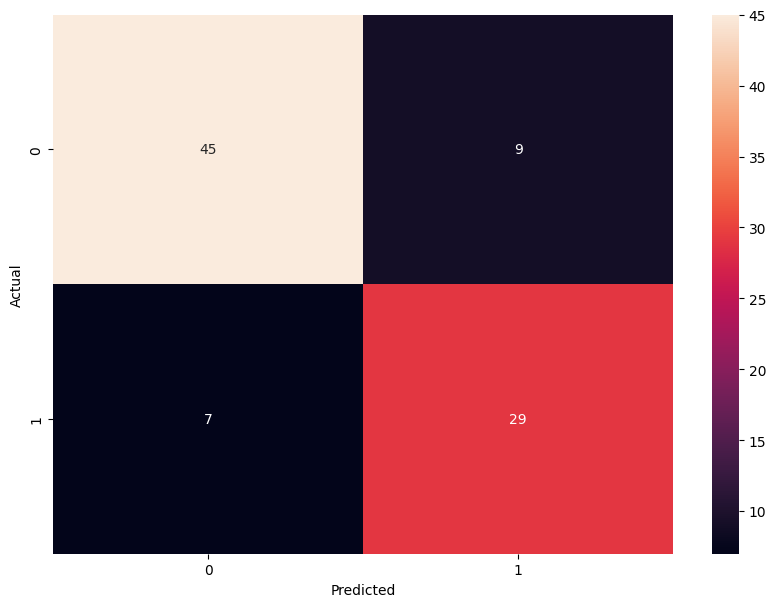

In [139]:
plt.figure(figsize = [10, 7])
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')